In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy .stats import zscore
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn .svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn .metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
from sklearn .model_selection import cross_val_score


In [2]:
df=pd.read_csv("Automobile_insurance_fraud.csv")

In [3]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [4]:
df.tail()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN
999,456,60,556080,11-11-1996,OH,250/500,1000,766.19,0,612260,...,?,5060,460,920,3680,Mercedes,E400,2007,N,NaN


In [5]:
df.shape

(1000, 40)

In [6]:
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [7]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:>

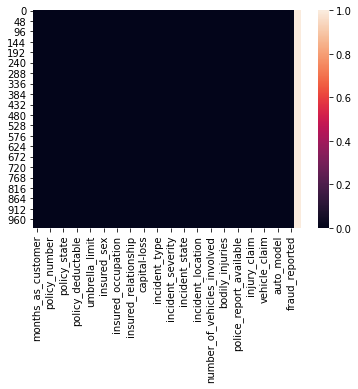

In [8]:
sns.heatmap(df.isnull())

In [9]:
df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,0.0
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,NaN
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,NaN
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,NaN
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,NaN
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,NaN
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,NaN
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,NaN


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [11]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,_c39
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,NaN
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,NaN
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,NaN
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,NaN
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,NaN
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,NaN
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,NaN
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,NaN
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,NaN
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,NaN


<AxesSubplot:>

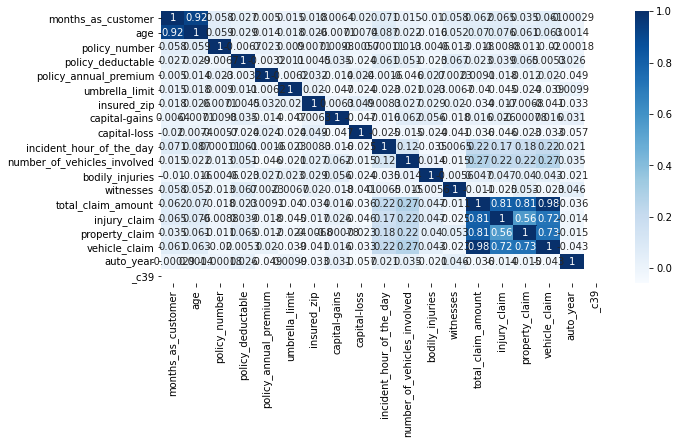

In [12]:
fig=plt.figure(figsize=(10,5))
hc=df.corr(method='pearson')
sns.heatmap(hc,annot=True,cmap="Blues")

In [13]:
df.drop('_c39',axis=1,inplace=True)

In [14]:
df.drop('auto_year',axis=1,inplace=True)

In [15]:
df.drop('policy_number',axis=1,inplace=True)

In [16]:
df.drop('auto_model',axis=1,inplace=True)

In [17]:
df.drop('auto_make',inplace=True,axis=1)

In [18]:
df.drop('policy_csl',inplace=True,axis=1)

In [19]:
df.drop('incident_date',axis=1,inplace=True)

In [20]:
df.drop('property_damage',axis=1,inplace=True)

In [21]:
df.drop('incident_severity',axis=1,inplace=True)

In [22]:
df.drop('insured_hobbies',axis=1,inplace=True)

In [63]:
df.drop('policy_bind_date',axis=1,inplace=True)

In [64]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['policy_state']=le.fit_transform(df['policy_state'])

In [65]:
df['insured_zip']=le.fit_transform(df['insured_zip'])

In [66]:
df['insured_education_level']=le.fit_transform(df['insured_education_level'])

In [67]:
df['insured_occupation']=le.fit_transform(df['insured_occupation'])

In [68]:
df['insured_relationship']=le.fit_transform(df['insured_relationship'])

In [69]:
df['police_report_available']=le.fit_transform(df['police_report_available'])

In [70]:
df['insured_sex']=le.fit_transform(df['insured_sex'])

In [71]:
df['incident_type']=le.fit_transform(df['incident_type'])

In [72]:
df['collision_type']=le.fit_transform(df['collision_type'])

In [73]:
df['incident_state']=le.fit_transform(df['incident_state'])

In [74]:
df['incident_city']=le.fit_transform(df['incident_city'])

In [75]:
df['incident_location']=le.fit_transform(df['incident_location'])

In [76]:
df['authorities_contacted']=le.fit_transform(df['authorities_contacted'])

In [77]:
df['fraud_reported']=le.fit_transform(df['fraud_reported'])

In [78]:
df

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,insured_sex,insured_education_level,insured_occupation,...,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,2,1000,1406.91,0,486,1,4,2,...,5,1,1,2,2,71610,6510,13020,52080,1
1,228,42,1,2000,1197.22,5000000,519,1,4,6,...,8,1,0,0,0,5070,780,780,3510,1
2,134,29,2,2000,1413.14,5000000,6,0,6,11,...,7,3,2,3,1,34650,7700,3850,23100,0
3,256,41,0,2000,1415.74,6000000,812,0,6,1,...,5,1,1,2,1,63400,6340,6340,50720,1
4,228,44,0,1000,1583.91,6000000,850,1,0,11,...,20,1,0,1,1,6500,1300,650,4550,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,2,1000,1310.80,0,19,0,5,2,...,20,1,0,1,0,87200,17440,8720,61040,0
996,285,41,0,1000,1436.79,0,813,0,6,9,...,23,1,2,3,0,108480,18080,18080,72320,0
997,130,34,2,500,1383.49,3000000,181,0,5,1,...,4,3,2,3,2,67500,7500,7500,52500,0
998,458,62,0,2000,1356.92,5000000,157,1,0,5,...,2,1,0,1,2,46980,5220,5220,36540,0


In [79]:
df.dtypes

months_as_customer               int64
age                              int64
policy_state                     int64
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                      int64
insured_education_level          int64
insured_occupation               int64
insured_relationship             int64
capital-gains                    int64
capital-loss                     int64
incident_type                    int64
collision_type                   int64
authorities_contacted            int64
incident_state                   int64
incident_city                    int64
incident_location                int64
incident_hour_of_the_day         int64
number_of_vehicles_involved      int64
bodily_injuries                  int64
witnesses                        int64
police_report_available          int64
total_claim_amount               int64
injury_claim             

<AxesSubplot:>

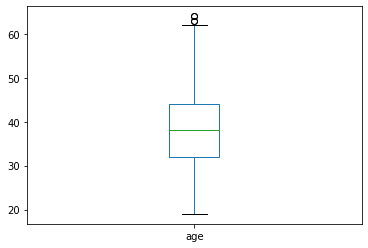

In [80]:
#univariate analysis
df['age'].plot.box()

<AxesSubplot:>

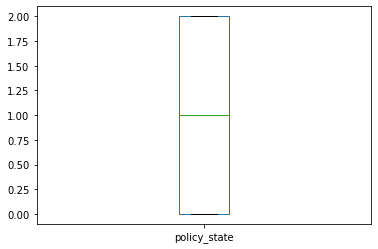

In [81]:
df['policy_state'].plot.box()

<AxesSubplot:>

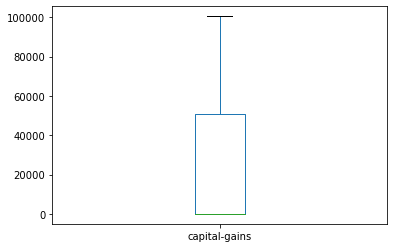

In [82]:
df['capital-gains'].plot.box()

<AxesSubplot:>

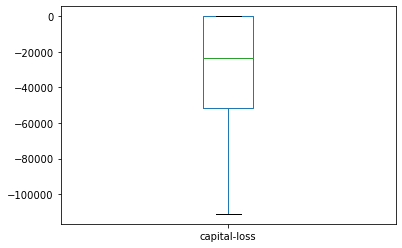

In [83]:
df['capital-loss'].plot.box()

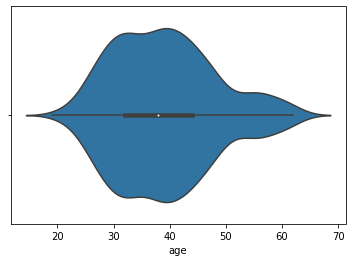

In [84]:
sns.violinplot(x='age',data=df)
plt.show()

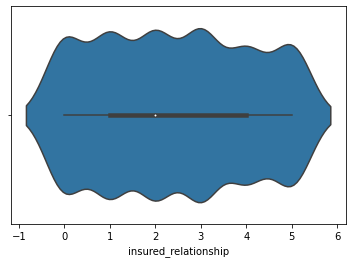

In [85]:
sns.violinplot(x='insured_relationship',data=df)
plt.show()

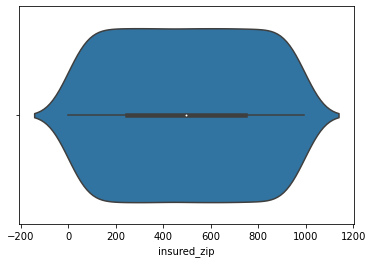

In [86]:
sns.violinplot(x='insured_zip',data=df)
plt.show()

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age', ylabel='Density'>

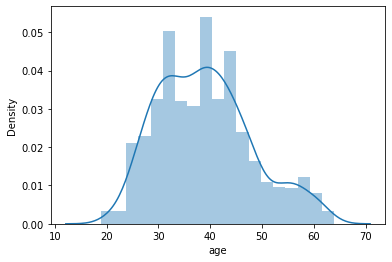

In [87]:
sns.distplot(df['age'])

C:\Users\DELL\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='umbrella_limit', ylabel='Density'>

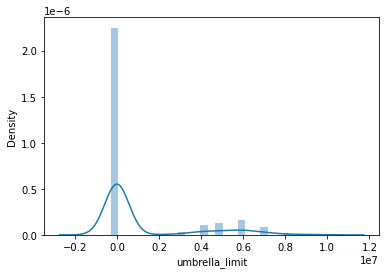

In [88]:
sns.distplot(df['umbrella_limit'])

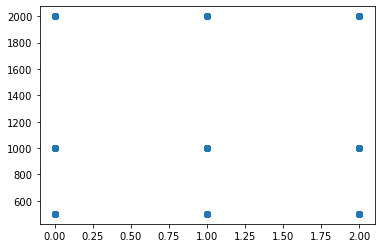

In [89]:
#bivariete  analysis
plt.scatter(df['policy_state'],df['policy_deductable'])
plt.show()

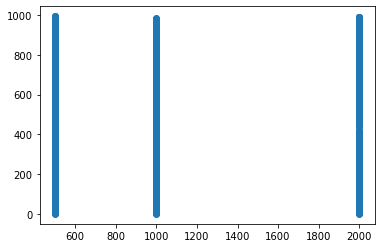

In [90]:
plt.scatter(df['policy_deductable'],df['insured_zip'])
plt.show()

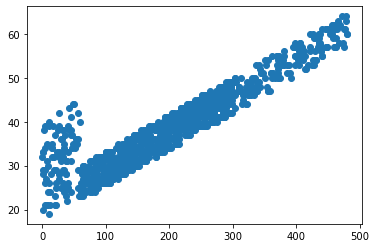

In [91]:
plt.scatter(df['months_as_customer'],df['age'])
plt.show()

In [92]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_state                  -0.026177
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.001683
insured_sex                    0.148630
insured_education_level       -0.000148
insured_occupation            -0.058881
insured_relationship           0.077488
capital-gains                  0.478850
capital-loss                  -0.391472
incident_type                  0.101507
collision_type                -0.193345
authorities_contacted         -0.121744
incident_state                -0.148865
incident_city                  0.049531
incident_location              0.000000
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.052967
total_claim_amount            -0.594582


In [93]:
#as we can see here there is not more skewness present in the data......so we do not need to remove skewness

In [94]:
x=df.drop(columns=["fraud_reported"])
y=df[["fraud_reported"]]

In [95]:
x.shape

(1000, 28)

In [96]:
y.shape

(1000, 1)

In [97]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.33,random_state=137)

In [98]:
print(x_train.shape)

(670, 28)


In [99]:
print(x_train.shape)

(670, 28)


In [100]:
print(y_train.shape)

(670, 1)


In [101]:
print(y_test.shape)

(330, 1)


In [102]:
lg=LogisticRegression()
lg.fit(x_train,y_train)
pred=lg.predict(x_test)
print('accuracy score:',)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


accuracy score:
0.7878787878787878
[[258   3]
 [ 67   2]]
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       261
           1       0.40      0.03      0.05        69

    accuracy                           0.79       330
   macro avg       0.60      0.51      0.47       330
weighted avg       0.71      0.79      0.71       330



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [104]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predg=gnb.predict(x_test)
print(accuracy_score(y_test,predg))
print(confusion_matrix(y_test,predg))
print(classification_report(y_test,predg))

0.6484848484848484
[[192  69]
 [ 47  22]]
              precision    recall  f1-score   support

           0       0.80      0.74      0.77       261
           1       0.24      0.32      0.28        69

    accuracy                           0.65       330
   macro avg       0.52      0.53      0.52       330
weighted avg       0.69      0.65      0.66       330



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


In [105]:
sv=SVC()
sv.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.7909090909090909
[[261   0]
 [ 69   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       261
           1       0.00      0.00      0.00        69

    accuracy                           0.79       330
   macro avg       0.40      0.50      0.44       330
weighted avg       0.63      0.79      0.70       330



In [107]:
rf=RandomForestClassifier(n_estimators=100)
rf.fit(x_train,y_train)
pred=sv.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

<ipython-input-107-5996ec07e3a8>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(x_train,y_train)


0.7909090909090909
[[261   0]
 [ 69   0]]
              precision    recall  f1-score   support

           0       0.79      1.00      0.88       261
           1       0.00      0.00      0.00        69

    accuracy                           0.79       330
   macro avg       0.40      0.50      0.44       330
weighted avg       0.63      0.79      0.70       330



C:\Users\DELL\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [108]:
ad=AdaBoostClassifier(n_estimators=100)
ad.fit(x_train,y_train)
pred=ad.predict(x_test)
print(accuracy_score(y_test,pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6909090909090909
[[217  44]
 [ 58  11]]
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       261
           1       0.20      0.16      0.18        69

    accuracy                           0.69       330
   macro avg       0.49      0.50      0.49       330
weighted avg       0.67      0.69      0.68       330



In [109]:
score=cross_val_score(lg,x,y,cv=5)
print(score)
print(score.mean())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  retu

[0.755 0.755 0.73  0.77  0.76 ]
0.7540000000000001


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [110]:
score=cross_val_score(rf,x,y,cv=5)
print(score)
print(score.mean())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning: A column-vector y was pa

[0.74  0.74  0.74  0.76  0.755]
0.7469999999999999


In [111]:
score=cross_val_score(ad,x,y,cv=5)
print(score)
print(score.mean())

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwar

[0.7   0.705 0.695 0.735 0.735]
0.7139999999999999


In [112]:
#as we can see here here the best model is logistic regression

In [114]:
import joblib

In [115]:
joblib.dump(lg,"insurancelg.obj")

['insurancelg.obj']